In [92]:
import sklearn.datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift, SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import homogeneity_completeness_v_measure
from sklearn.metrics import silhouette_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='ticks')

In [98]:
iris = sklearn.datasets.load_iris()
d1 = pd.DataFrame(data=iris.data, columns=iris.feature_names)
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [99]:
d1.shape

(150, 4)

In [100]:
d1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [101]:
scaler = MinMaxScaler()

d1_scaled = pd.DataFrame(scaler.fit_transform(X=d1), columns=d1.columns)
d1_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [102]:
pca = PCA(n_components=2, random_state=4)

d2 = pd.DataFrame(data=pca.fit_transform(X=d1_scaled), columns=['PC1', 'PC2'])
d2.head()

,PC1,PC2
0,-0.630703,0.107578
1,-0.622905,-0.104260
2,-0.669520,-0.051417
3,-0.654153,-0.102885
4,-0.648788,0.133488


In [103]:
print('Доля объяснённой диспреси: {};\nСумма долей: {}.'
      .format(pca.explained_variance_ratio_, pca.explained_variance_ratio_.sum()))

Доля объяснённой диспреси: [0.84136038 0.11751808];
Сумма долей: 0.9588784639918415.


In [104]:
tsne = TSNE(n_components=2, learning_rate='auto', init='random', random_state=4)

d3 = pd.DataFrame(data=tsne.fit_transform(X=d1_scaled), columns=['C1', 'C2'])
d3.head()

,C1,C2
0,17.273378,18.325972
1,13.992175,18.538797
2,14.868653,17.626312
3,14.225590,17.540525
4,17.659443,17.901611


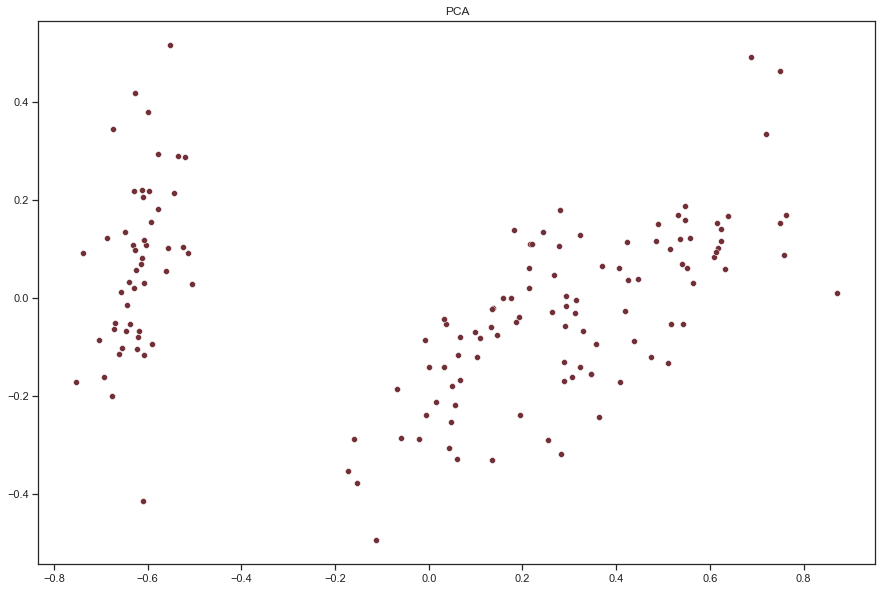

In [105]:
fig, ax = plt.subplots(sharex='col', figsize=(15, 10))
sns.scatterplot(data=d2, x='PC1', y='PC2', color='#722F37', legend=False, ax=ax)
ax.set(xlabel=None, ylabel=None, title='PCA')
plt.show()

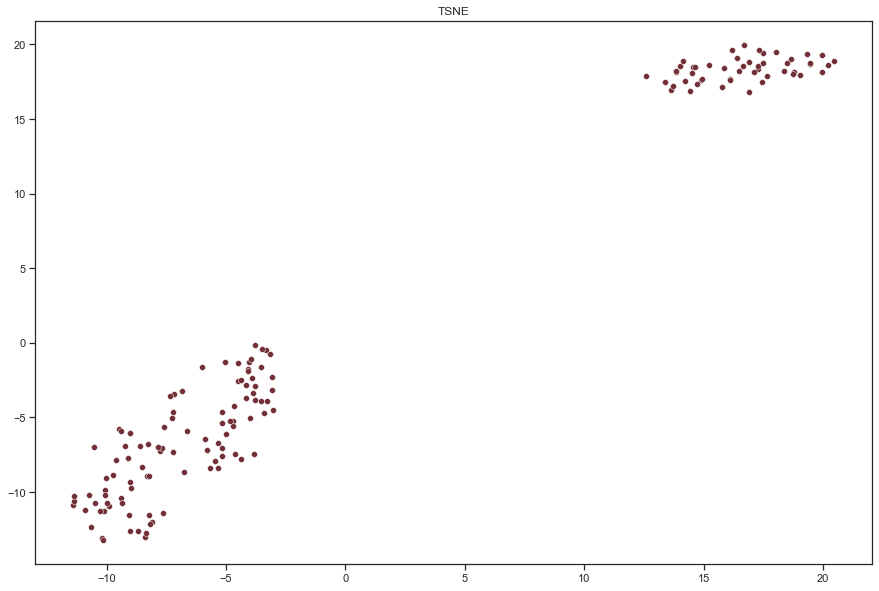

In [106]:
fig, ax = plt.subplots(sharex='col', figsize=(15, 10))
sns.scatterplot(data=d3, x='C1', y='C2', color='#722F37', legend=False, ax=ax)
ax.set(xlabel=None, ylabel=None, title='TSNE')
plt.show()

In [116]:
def do_clustering(datasets, method):
    """
    Фунция кластеризации нескольких датасетов

    :param datasets: Датасеты
    :param method: Метод кластеризации
    :return: Список кластеров, центры кластеров
    """
    results = []
    for dataset in datasets:
        result = method.fit_predict(dataset)
        results.append(result)

    return results


def do_clustering_with_centers(datasets, method):
    """
    Фунция кластеризации нескольких датасетов с центрами кластеризации

    :param datasets: Датасеты
    :param method: Метод кластеризации
    :return: Список кластеров, центры кластеров
    """
    results = []
    centers = []
    for dataset in datasets:
        result = method.fit_predict(dataset)
        centers.append(method.cluster_centers_)
        results.append(result)

    return results, centers


def cluster_metrics(datasets, clusters):
    """
    Функция оценки качества кластеризации различных наборов данных

    :param datasets: Датасеты
    :param clusters: Кластеры
    :param cluster_true: Истинное значение класстеров
    :return: Таблицу с метриками для каждого датасета
    """

    datasets_names = ['D1', 'D2', 'D3']

    sl = []

    for cluster, dataset in zip(clusters, datasets):
        try:
            sil_score = silhouette_score(dataset, cluster)
        except:
            sil_score = None
        sl.append(sil_score)

    result = pd.DataFrame({'Datasets': datasets_names,
                           'Silhouette': sl})
    return result


def plot_clusters(clusters):
    """
    Фунция визуализации кластеров

    :param clusters: Кластеры для визуализации
    """
    f, a = plt.subplots(1, 2, figsize=(15, 5))
    sns.scatterplot(data=d2, x='PC1', y='PC2', hue=clusters[0], palette='Accent', legend=False, ax=a[0])
    sns.scatterplot(data=d3, x='C1', y='C2', hue=clusters[1], palette='Accent', legend=False, ax=a[1])
    a[0].set(xlabel=None, ylabel=None, title='PCA')
    a[1].set(xlabel=None, ylabel=None, title='t-SNE')
    plt.show()

def plot_clusters_with_centers(clusters, clusters_centers):
    """
    Фунция визуализации кластеров

    :param clusters: Кластеры для визуализации
    :param clusters_centers: Центры кластеров
    """
    f, a = plt.subplots(1, 2, figsize=(15, 5))
    sns.scatterplot(data=d2, x='PC1', y='PC2', hue=clusters[0], palette='Accent', legend=False, ax=a[0])
    sns.scatterplot(data=clusters_centers[0], x=clusters_centers[0][:, 0], y=clusters_centers[0][:, 1],
                    ax=a[0], marker='x', s=128, color='black')
    sns.scatterplot(data=d3, x='C1', y='C2', hue=clusters[1], palette='Accent', legend=False, ax=a[1])
    sns.scatterplot(data=clusters_centers[1], x=clusters_centers[1][:, 0], y=clusters_centers[1][:, 1],
                    ax=a[1], marker='x', s=128, color='black')
    a[0].set(xlabel=None, ylabel=None, title='PCA')
    a[1].set(xlabel=None, ylabel=None, title='t-SNE')
    plt.show()

In [108]:
dataset_list = [d1_scaled, d2, d3]

In [109]:
k_means = KMeans(n_clusters=3, random_state=4)
type(k_means)
k_means_clusters, k_means_centers = do_clustering_with_centers(dataset_list, k_means)

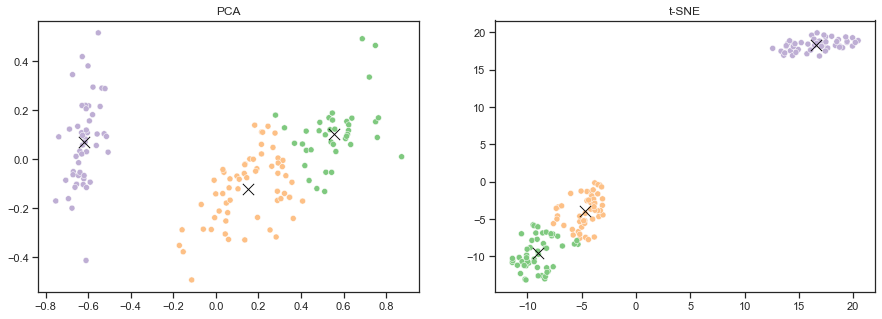

In [110]:
plot_clusters_with_centers(k_means_clusters[1:], k_means_centers[1:])

In [117]:
cluster_metrics(dataset_list, k_means_clusters)

,Datasets,Silhouette
0,D1,0.504769
1,D2,0.565384
2,D3,0.660312


In [118]:
def plot_inertia(dataset, method):
    """
    Функция для визуализации инерции
    :param dataset: Датасет
    :param method: Метод кластеризации
    """
    _, a = plt.subplots(figsize=(7, 5))
    inertia = []
    temp_x = dataset
    for k in range(1, 8):
        kmeans = method(n_clusters=k, random_state=4).fit(temp_x)
        inertia.append(kmeans.inertia_)
    sns.pointplot(x=np.arange(1, 8), y=inertia, ax=a)
    plt.xlabel('K')
    plt.ylabel('Инерция')
    plt.show()

C:\Users\Xiaomi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


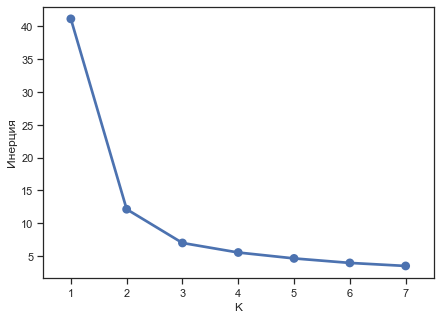

In [119]:
plot_inertia(d1_scaled, KMeans)

In [120]:
aglo = AgglomerativeClustering(n_clusters=3)
aglo_clusters = do_clustering(dataset_list, aglo)

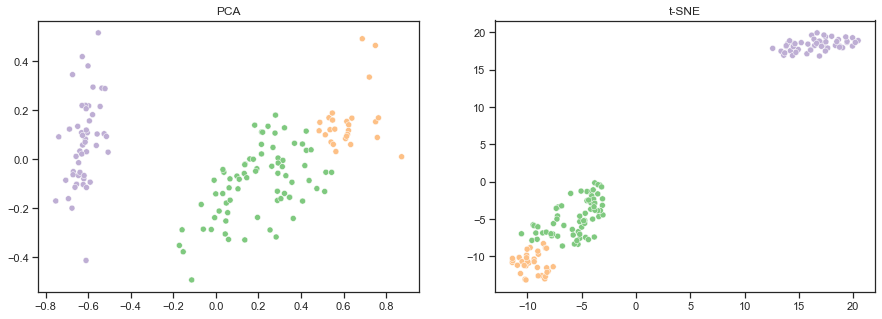

In [121]:
plot_clusters(aglo_clusters[1:])

In [122]:
cluster_metrics(dataset_list, aglo_clusters)

,Datasets,Silhouette
0,D1,0.504800
1,D2,0.553610
2,D3,0.643699


In [123]:
aff_pro = AffinityPropagation(random_state=4)
aff_pro_clusters = do_clustering(dataset_list, aff_pro)

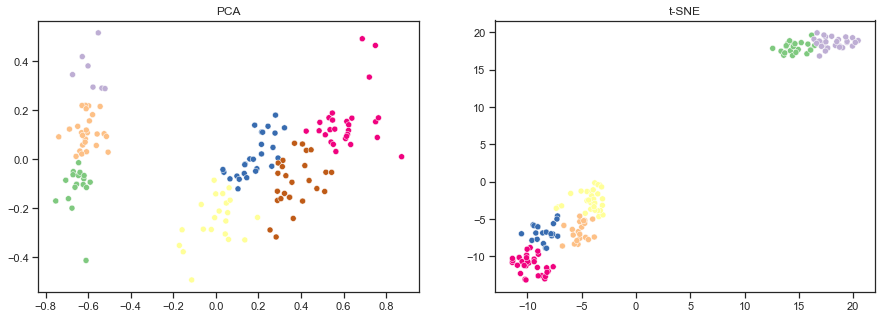

In [124]:
plot_clusters(aff_pro_clusters[1:])

In [125]:
cluster_metrics(dataset_list, aff_pro_clusters)

,Datasets,Silhouette
0,D1,0.318824
1,D2,0.432602
2,D3,0.490593


In [153]:
gauss = GaussianMixture(n_components=3, random_state=4)
gauss_clusters = do_clustering(dataset_list, gauss)

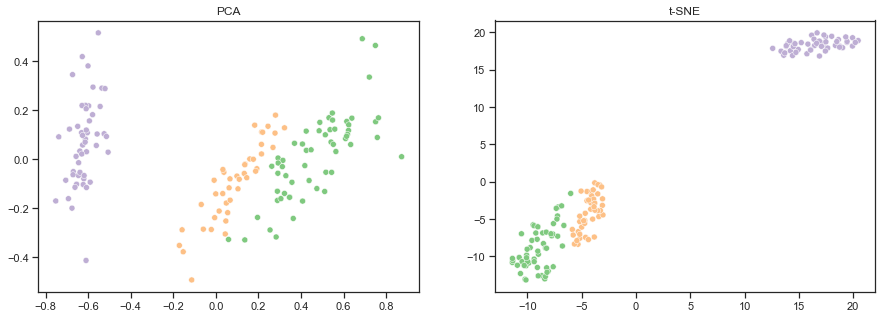

In [154]:
plot_clusters(gauss_clusters[1:])

In [155]:
cluster_metrics(dataset_list, gauss_clusters)

,Datasets,Silhouette
0,D1,0.451231
1,D2,0.478099
2,D3,0.610222
